# BiodivNER Data Preprocessing

Adapted from: Nora Abdelmageed's BiodivBERT (2023) <br>
Original code: https://github.com/fusion-jena/BiodivBERT/tree/main

## Import and Configurations

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install tabulate

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Dataset Configurations

In [2]:
root_data_dir = "../Datasets/NER/BiodivNER/"

dataset = "train"
train_csv_file_path = "train.csv"
val_csv_file_path = "dev.csv"
test_csv_file_path = "test.csv"

## Data Loading Utilities

In [3]:
def loadData(csv_file_path):
  dataset_path = os.path.join(root_data_dir, csv_file_path)
  data = pd.read_csv(dataset_path, encoding="latin1")
  data = data.fillna(method="ffill")
  return data

In [4]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),                                                          
                                                        s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

## Load Datasets

In [5]:
data = loadData(train_csv_file_path)

/tmp/ipykernel_424989/3117403119.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [6]:
data.head(10)

,Sentence #,Word,Tag
0,Sentence: 0,Samplenr,O
1,Sentence: 0,Seedlingnr,O
2,Sentence: 0,Plot,O
3,Sentence: 0,Record,O
4,Sentence: 0,Date,O
5,Sentence: 0,Planted_Species,O
6,Sentence: 0,Density,B-Quality
7,Sentence: 0,Treatment,B-Phenomena
8,Sentence: 0,Dead,B-Quality
9,Sentence: 0,Height_P,O


In [7]:
val_data = loadData(val_csv_file_path)

/tmp/ipykernel_424989/3117403119.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [8]:
val_data.head(10)

,Sentence #,Word,Tag
0,Sentence: 0,For,O
1,Sentence: 0,live,B-Organism
2,Sentence: 0,snags,I-Organism
3,Sentence: 0,the,O
4,Sentence: 0,measurement,O
5,Sentence: 0,height,B-Quality
6,Sentence: 0,is,O
7,Sentence: 0,indicated,O
8,Sentence: 0,by,O
9,Sentence: 0,a,O


In [9]:
test_data = loadData(test_csv_file_path)

/tmp/ipykernel_424989/3117403119.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [10]:
test_data.head(10)

,Sentence #,Word,Tag
0,Sentence: 0,Combining,O
1,Sentence: 0,metabolic,O
2,Sentence: 0,and,O
3,Sentence: 0,food-,O
4,Sentence: 0,web,O
5,Sentence: 0,theory,O
6,Sentence: 0,",",O
7,Sentence: 0,we,O
8,Sentence: 0,calculate,O
9,Sentence: 0,annual,O


## Exploratory Data Analysis

### Vocabulary and tags

In [11]:
#if the data are in string style, we propably use tokenzer.fit_on_texts instead of list manipulation like here

VOCAB = list(set(list(data["Word"].values) + \
                 list(val_data["Word"].values) + \
                 list(test_data["Word"].values)))
VOCAB.append("ENDPAD")

n_words = len(VOCAB) #n_words includes all vocab from train and validation test.

tags = list(set(data["Tag"].values))

n_tags = len(tags)

In [12]:
print(n_words, VOCAB[0:10] ,VOCAB[n_words-1], sep='\n')

9158
['2004825', 'database', '50', 'spatially-replicated', 'Mn', 'when', 'adopted', 'contributes', 'array', 'great']
ENDPAD


In [13]:
print(n_words, VOCAB[0:10] ,VOCAB[n_words-1], sep='\n')

9158
['2004825', 'database', '50', 'spatially-replicated', 'Mn', 'when', 'adopted', 'contributes', 'array', 'great']
ENDPAD


### Creating sentences for train, val, and test sets

In [14]:
getter = SentenceGetter(data)
sentences = getter.sentences
sent = getter.get_next()
print(sent)

[('bottom', 'O'), ('board', 'O'), ('debris', 'O'), (',', 'O'), ('frames', 'O'), (',', 'O'), ('landing', 'O'), ('platforms', 'O'), (')', 'O'), (',', 'O'), ('and', 'O'), ('isolates', 'O'), ('of', 'O'), ('microbes', 'O'), (',', 'O'), ('parasites', 'O'), ('and', 'O'), ('pathogens', 'O'), ('from', 'O'), ('honey', 'B-Organism'), ('bees', 'I-Organism'), ('.', 'O')]


In [15]:
getter_val = SentenceGetter(val_data)
sentences_val = getter_val.sentences
sent_val = getter_val.get_next()
print(sent_val)

[('However', 'O'), (',', 'O'), ('the', 'O'), ('lack', 'O'), ('of', 'O'), ('correlation', 'O'), ('between', 'O'), ('dung', 'O'), ('beetle', 'O'), ('community', 'B-Environment'), ('characteristics', 'O'), ('and', 'O'), ('dung', 'O'), ('removal', 'O'), ('highlights', 'O'), ('the', 'O'), ('need', 'O'), ('for', 'O'), ('further', 'O'), ('research', 'O'), ('into', 'O'), ('spatial', 'O'), ('variation', 'O'), ('in', 'O'), ('biodiversityÃ\x83Â¢Ã¢Â\x82Â¬Ã¢Â\x80Â\x9cecosystem', 'O'), ('function', 'O'), ('relationships', 'O'), ('and', 'O'), ('how', 'O'), ('the', 'O'), ('results', 'O'), ('of', 'O'), ('such', 'O'), ('studies', 'O'), ('are', 'O'), ('affected', 'O'), ('by', 'O'), ('methodological', 'O'), ('choices', 'O'), ('.', 'O')]


In [16]:
getter_test = SentenceGetter(test_data)
sentences_test = getter_test.sentences
sent_test = getter_test.get_next()
print(sent_test)

[('The', 'O'), ('primacy', 'O'), ('of', 'O'), ('either', 'O'), ('species', 'B-Quality'), ('or', 'O'), ('functional', 'O'), ('group', 'O'), ('richness', 'B-Quality'), ('effects', 'O'), ('depended', 'O'), ('on', 'O'), ('the', 'O'), ('sequence', 'O'), ('of', 'O'), ('testing', 'O'), ('these', 'O'), ('terms', 'O'), (',', 'O'), ('indicating', 'O'), ('that', 'O'), ('both', 'O'), ('aspects', 'O'), ('of', 'O'), ('richness', 'B-Quality'), ('were', 'O'), ('congruent', 'O'), ('and', 'O'), ('complementary', 'O'), ('to', 'O'), ('expected', 'O'), ('strong', 'O'), ('effects', 'O'), ('of', 'O'), ('legume', 'O'), ('presence', 'O'), ('and', 'O'), ('grass', 'B-Organism'), ('presence', 'O'), ('on', 'O'), ('plant', 'B-Organism'), ('chemical', 'B-Quality'), ('composition', 'I-Quality'), ('.', 'O')]


### Sentence lengths

T5's recommended number of tokens per input is at most 512. The purpose of this is to save on memory resources.

In [17]:
plt.style.use("ggplot")

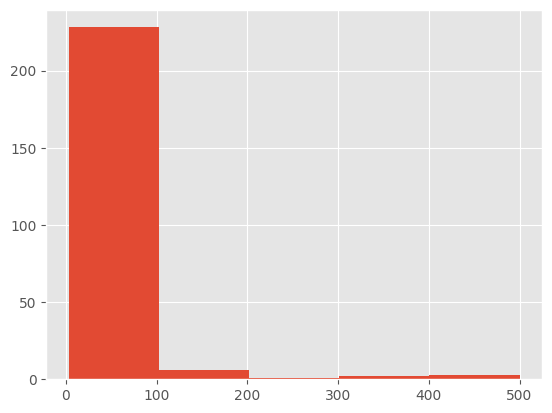

In [18]:
plt.hist([len(s) for s in sentences_val], bins=5)
plt.show()

In [19]:
max([len(s) for s in sentences_val])

500

## Encoder format

Encoder/decoder dictionaries for tags

In [20]:
tag2id = {tag: id for id, tag in enumerate(tags)}
id2tag = {id: tag for tag, id in tag2id.items()}
print(tag2id)

{'I-Phenomena': 0, 'I-Quality': 1, 'I-Matter': 2, 'B-Location': 3, 'I-Location': 4, 'B-Phenomena': 5, 'B-Organism': 6, 'B-Matter': 7, 'B-Environment': 8, 'I-Environment': 9, 'B-Quality': 10, 'I-Organism': 11, 'O': 12}


In [21]:
tag2id_list = list(tag2id.items())
print(tabulate(tag2id_list, headers=['Tag', 'ID']))

Tag              ID
-------------  ----
I-Phenomena       0
I-Quality         1
I-Matter          2
B-Location        3
I-Location        4
B-Phenomena       5
B-Organism        6
B-Matter          7
B-Environment     8
I-Environment     9
B-Quality        10
I-Organism       11
O                12


In [22]:
id2tag_list = list(id2tag.items())
print(tabulate(id2tag_list, headers=['ID', 'Tag']))

  ID  Tag
----  -------------
   0  I-Phenomena
   1  I-Quality
   2  I-Matter
   3  B-Location
   4  I-Location
   5  B-Phenomena
   6  B-Organism
   7  B-Matter
   8  B-Environment
   9  I-Environment
  10  B-Quality
  11  I-Organism
  12  O


Split texts from tags (use two different Python lists)

In [23]:
def get_text_tags_lists(sentences):
  texts = []
  tags = []
  for sent in sentences: #list of tuples    
    sent_texts = []
    sent_tags = []  
    for tuple1 in sent:  
      sent_texts.append(tuple1[0])
      sent_tags.append(tuple1[1])

    texts.append(sent_texts)
    tags.append(sent_tags)
  return texts, tags

In [24]:
train_texts_raw, train_tags_raw = get_text_tags_lists(sentences)
val_texts_raw, val_tags_raw = get_text_tags_lists(sentences_val)
test_texts_raw, test_tags_raw = get_text_tags_lists(sentences_test)

## Remove Sentences With Non-ASCII Characters

In [25]:
def has_non_ascii(sentence):
    return any(ord(char) > 127 for char in sentence)

def clean_non_ascii(texts, tags):
    clean_inputs = []
    clean_labels = []

    for sentence, label in zip(texts, tags):
        sentence2 = ' '.join(sentence)
        if has_non_ascii(sentence2):
            continue
        
        clean_inputs.append(sentence)
        clean_labels.append(label)

    return clean_inputs, clean_labels

In [26]:
train_texts, train_tags = clean_non_ascii(train_texts_raw, train_tags_raw)
val_texts, val_tags = clean_non_ascii(val_texts_raw, val_tags_raw)
test_texts, test_tags = clean_non_ascii(test_texts_raw, test_tags_raw)

## Model

In [27]:
from transformers import T5TokenizerFast
from tokenizers import AddedToken

tokenizer = T5TokenizerFast.from_pretrained("t5-small")
tokenizer.add_special_tokens({"additional_special_tokens": [AddedToken("\n")]})
  
train_encodings = tokenizer(train_texts, is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)
val_encodings = tokenizer(val_texts, is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)
test_encodings = tokenizer(test_texts, is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)

/home/nlpbiodiv2023/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Handling Label Mismatch

In [28]:
def encode_tags(tags, encodings):
    labels = [[tag2id[tag] for tag in doc] for doc in tags]
    encoded_labels = []
    for doc_labels, doc_offset in zip(labels, encodings.offset_mapping):      
        # create an empty array of -100
        doc_enc_labels = np.ones(len(doc_offset),dtype=int) * -100
        arr_offset = np.array(doc_offset)

        #since we enabled the truncation=ture in the encoding, we should handle this again in the labels
        max_len = len(doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)]) 

        # set labels whose first offset position is 0 and the second is not 0 
        doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)] = doc_labels[0:max_len]

    
        encoded_labels.append(doc_enc_labels.tolist())
    return encoded_labels

In [29]:
train_labels = encode_tags(train_tags, train_encodings)

ValueError: NumPy boolean array indexing assignment cannot assign 97 input values to the 110 output values where the mask is true